## NetReco - Data Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("netflix_titles.csv")

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.shape

(8807, 12)

In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [21]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## **DATA CLEANING**

In [24]:
# We will replace missing values with unknown and Not Available
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

In [26]:
#Changing date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [28]:
#Count duplicates
df.duplicated().sum()

0

In [30]:
df = df.drop_duplicates()

In [32]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

## **EXPLORATORY DATA ANALYSIS**

### **PART 1 — Count of Movies vs TV Shows**

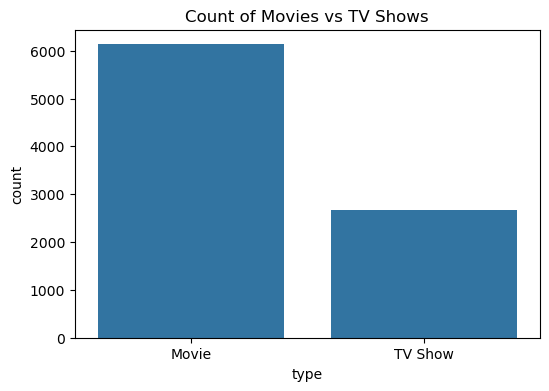

In [36]:
#To show what type of content NETFLIX mostly releases
plt.figure(figsize = (6,4))
sns.countplot(data = df, x='type')
plt.title("Count of Movies vs TV Shows")
plt.show()

### **PART 2 — Top 10 Countries With Most Netflix Titles**

In [38]:
#Splitting Multi- country rows and strip spaces
df_countries = df['country'].str.split(',', expand = True).stack().str.strip().reset_index(level = 1, drop = True)

In [40]:
#Counting Top countries
top_countries = df_countries.value_counts().head(10)
top_countries

United States     3690
India             1046
Unknown            831
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

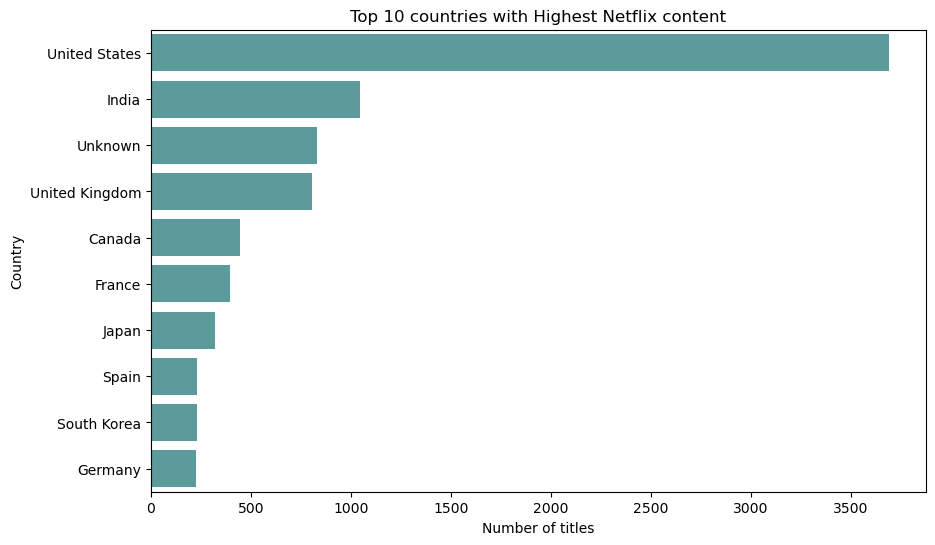

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, color='#50A6A6')
plt.title("Top 10 countries with Highest Netflix content")
plt.xlabel("Number of titles")
plt.ylabel("Country")
plt.show

### **PART 3 — Trend of Content Added Over the Years**

In [45]:
#Coverting date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [47]:
#Extract the year Netflix added each title
df['year_added'] = df['date_added'].dt.year

In [48]:
#Count titles per year
title_per_year = df['year_added'].value_counts().sort_index()
title_per_year

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

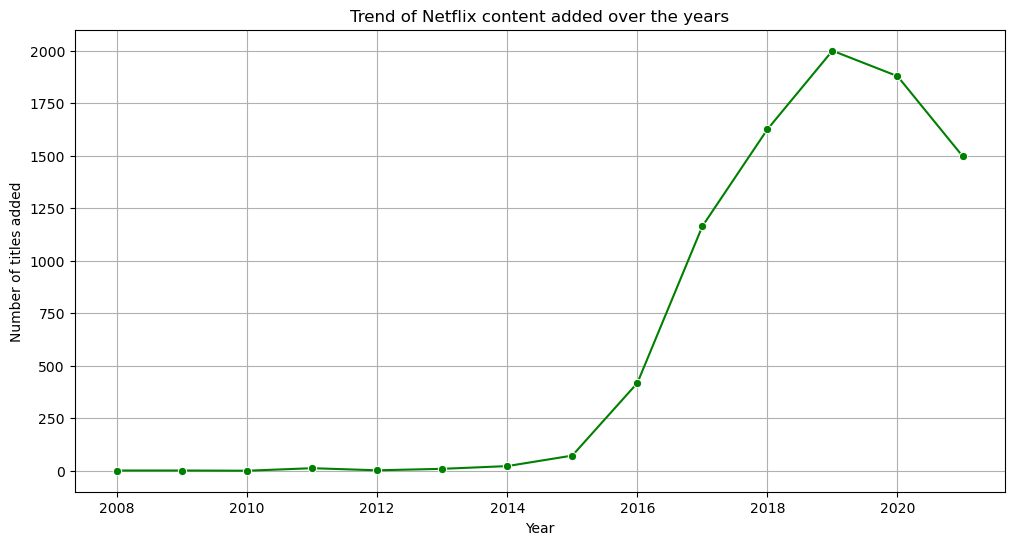

In [52]:
#trend line
plt.figure(figsize=(12,6))
sns.lineplot(x=title_per_year.index, y=title_per_year.values, marker = 'o', color='g')
plt.title("Trend of Netflix content added over the years")
plt.xlabel("Year")
plt.ylabel("Number of titles added")
plt.grid(True)
plt.show()

### **GENRE ANALYSIS**

### **PART 4 — Top Genres / Categories on Netflix**

Netflix stores genres inside the column: listed_in, and it contains multiple genres separated by commas.

Example:
"Dramas, International Movies"

So we need to split them and count them properly.

In [57]:
#EXTRACT GENRE 
df['genre_list'] = df['listed_in'].str.split(', ')

In [58]:
df[['title', 'genre_list']].head(10)

,title,genre_list
0,Dick Johnson Is Dead,[Documentaries]
1,Blood & Water,"[International TV Shows, TV Dramas, TV Mysteries]"
2,Ganglands,"[Crime TV Shows, International TV Shows, TV Ac..."
3,Jailbirds New Orleans,"[Docuseries, Reality TV]"
4,Kota Factory,"[International TV Shows, Romantic TV Shows, TV..."
5,Midnight Mass,"[TV Dramas, TV Horror, TV Mysteries]"
6,My Little Pony: A New Generation,[Children & Family Movies]
7,Sankofa,"[Dramas, Independent Movies, International Mov..."
8,The Great British Baking Show,"[British TV Shows, Reality TV]"
9,The Starling,"[Comedies, Dramas]"


In [59]:
#Split genres into individual rows
df_genres = df['listed_in'].str.split(',', expand = True).stack().str.strip().reset_index(level=1, drop=True)

In [63]:
#Count the top 10 genres
top_genres = df_genres.value_counts().head(10)
top_genres

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [65]:
#Explode genre
genre_df = df.explode('genre_list')
genre_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,genre_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,International TV Shows
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,TV Dramas
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Crime TV Shows


In [67]:
genre_df['genre_list'].unique()[:20]

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies'], dtype=object)

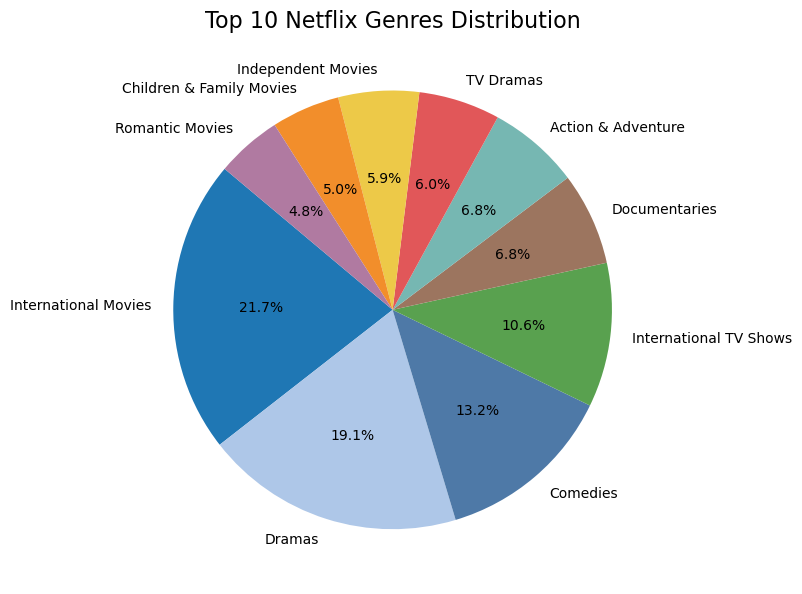

In [69]:
top10_genres = genre_df['genre_list'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top10_genres, labels=top10_genres.index, autopct="%1.1f%%", startangle=140,
colors = [
    "#1f77b4",
    "#aec7e8",
    "#4e79a7",
    "#59a14f",
    "#9c755f",
    "#76b7b2",
    "#e15759",
    "#edc948",
    "#f28e2b",
    "#b07aa1"
]
)
plt.title("Top 10 Netflix Genres Distribution", fontsize=16)
plt.tight_layout()
plt.show()


## **Part 5**
### **Movie Duration Analysis**

In [71]:
df['type'].unique()
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [74]:
#MOVIES DURATION ANALYSIS
#filter only movies
movies_df = df[df['type'] == 'Movie']

### What we will create:

duration_int → numeric minutes or seasons

duration_type → "min" or "season"

eliminates "Unknown"

handles "Season" vs "Seasons"

ensures no conversion errors

In [77]:
movies_df = df[df['type'] == 'Movie'].copy()

movies_df['duration_value'] = (
    movies_df['duration']
        .str.extract(r'(\d+)')     # extract only digits
        .astype(float)            # convert to number
)

movies_df = movies_df.dropna(subset=['duration_value'])  # remove Unknown rows
movies_df['duration_value'] = movies_df['duration_value'].astype(int)


In [79]:
movies_df['duration_value'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_value, dtype: float64

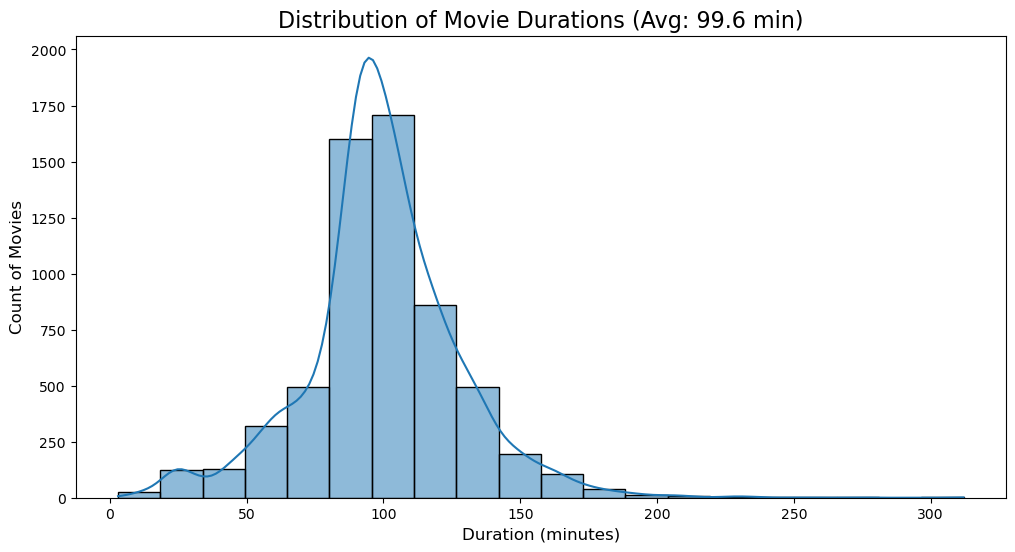

In [81]:
#plotting
plt.figure(figsize=(12, 6))
sns.color_palette("rocket", as_cmap=True) # Get a CMap
sns.histplot(movies_df['duration_value'], bins=20, kde=True)
plt.title(f"Distribution of Movie Durations (Avg: {movies_df['duration_value'].mean():.1f} min)", fontsize=16)
plt.xlabel("Duration (minutes)", fontsize = 12)
plt.ylabel("Count of Movies", fontsize = 12)
plt.show()

### **TV Show Season Analysis**

In [83]:
tv_df = df[df['type'] == 'TV Show'].copy()
tv_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,genre_list
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,"[International TV Shows, Romantic TV Shows, TV..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,"[TV Dramas, TV Horror, TV Mysteries]"


In [85]:
# Extract numeric season count
tv_df['season_count'] = (
    tv_df['duration']
    .str.extract(r'(\d+)', expand=False)   # extract digits
    .astype(int)
)

tv_df[['title', 'duration', 'season_count']].head()


,title,duration,season_count
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1


In [87]:
tv_df['season_count'].describe()

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: season_count, dtype: float64

In [89]:
tv_df['duration'].unique()[:20]

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

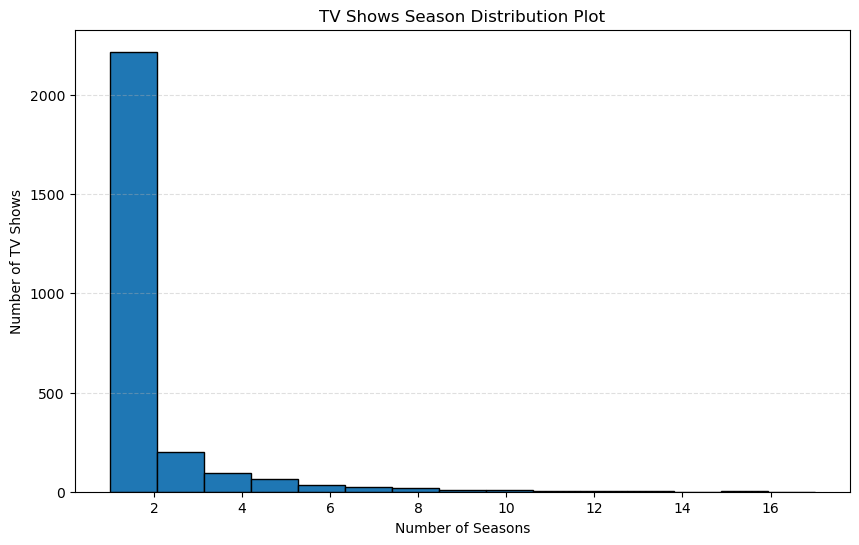

In [92]:
#*TV SHOWS SEASON DISTRIBUTION PLOT*
plt.figure(figsize=(10,6))
plt.hist(tv_df['season_count'], bins=15, edgecolor='black')
plt.title("TV Shows Season Distribution Plot")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

## **PART 6**

### **Director & Cast Network Analysis**

In [96]:
# Separate dataframe for director analysis
director_df = df[['title', 'director']].copy()
director_df['director'] = director_df['director'].replace(['Unknown', 'Not Given', ''], np.nan)

#Drop rows with no director
director_df.dropna(subset=['director'], inplace=True)
#Explode
director_explode=director_df.explode('director')
director_explode.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
2,Ganglands,Julien Leclercq
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha"
7,Sankofa,Haile Gerima


In [98]:
#top 10 directors
top_directors = (director_explode['director']).value_counts().head(15).sort_values(ascending=True)

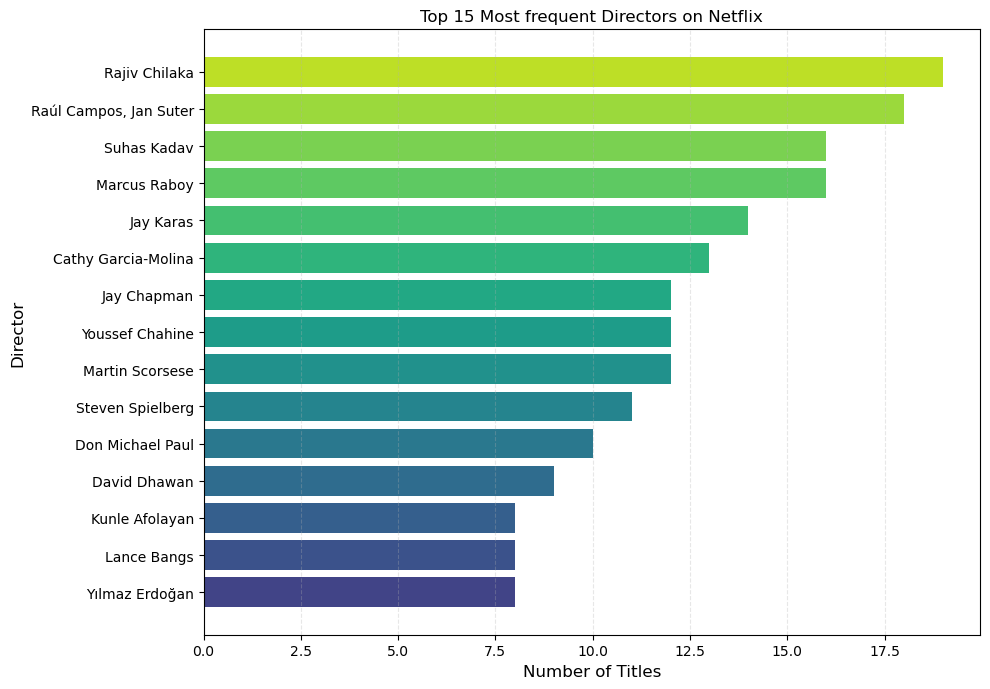

In [100]:
#plot
plt.figure(figsize=(10, 7))
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(top_directors)))
plt.barh(top_directors.index, top_directors.values, color=colors)
plt.title("Top 15 Most frequent Directors on Netflix")
plt.xlabel("Number of Titles", fontsize = 12)
plt.ylabel("Director", fontsize = 12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### **Actor Analysis**

In [103]:
#split actors into list
actor_explode = df.assign(actor_list=df['cast'].str.split(', ').explode('actor_list'))
# remove unknown
actor_explode = actor_explode[actor_explode['actor_list'] != "Not Available"]
actor_explode.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,genre_list,actor_list
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,"[International TV Shows, TV Dramas, TV Mysteries]",Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,"[Crime TV Shows, International TV Shows, TV Ac...",Khosi Ngema
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,"[Docuseries, Reality TV]",Gail Mabalane
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,"[International TV Shows, Romantic TV Shows, TV...",Thabang Molaba
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,"[TV Dramas, TV Horror, TV Mysteries]",Dillon Windvogel


In [105]:
actor_counts = actor_explode['actor_list'].value_counts().head(20)

In [107]:
actor_counts

actor_list
Julie Tejwani          22
Rupa Bhimani           22
Rajesh Kava            21
Jigna Bhardwaj         19
Vatsal Dubey           17
Swapnil                14
Mousam                 14
Kazuhiko Inoue          8
Junko Takeuchi          8
Chie Nakamura           8
David Spade             8
Fortune Feimster        8
Tusshar Kapoor          8
Taylor Lautner          7
Kristen Stewart         7
Blossom Chukwujekwu     7
London Hughes           7
Daisuke Ono             7
Stanley Tucci           6
Ashley Greene           6
Name: count, dtype: int64